In [ ]:
# Package imports
import numpy as np
from scipy import linalg
from math import sqrt
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from scipy.linalg import hilbert
import time
import sys 
import sklearn
import sklearn.datasets
import sklearn.linear_model
import random
import copy
import math

In [2]:
# Generate datapoints: x

x = np.random.uniform(0.0, 1.0, 75)
np.random.seed(1)

In [3]:
# generate h(x)
h_prev = 0.5 + 0.4 * np.sin(2*math.pi*x)
# add noise to h
np.random.seed(1)
noise = np.random.uniform(-0.1, 0.1, 75)
h = h_prev + noise

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
f3 = np.zeros((75,1))

In [6]:
X_test = np.array(list(zip(x, h)))
X_clt = np.array(list(zip(x, f3)))

In [7]:
data = pd.DataFrame({'x': x, 'h': 0 })

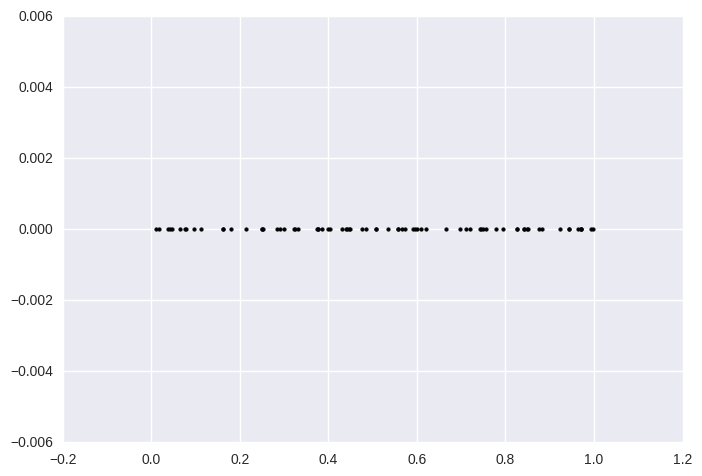

In [8]:
plt.scatter(x,f3, c='black', s=7)
plt.show()

In [9]:
# Number of clusters
k = 4

#Take random sampel data points
s = data.sample(4)
s
# X coordinates of random centroids
C_x = np.array(s['x'])
# Y coordinates of random centroids
C_y = np.array(s['h'])
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 0.07936241  0.        ]
 [ 0.53553051  0.        ]
 [ 0.50871843  0.        ]
 [ 0.9430958   0.        ]]


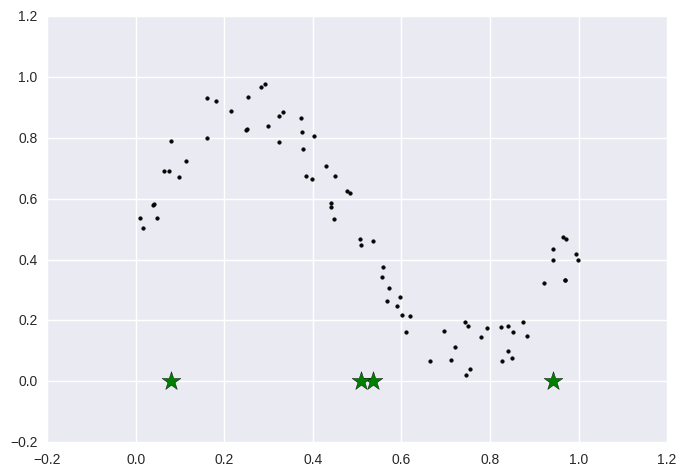

In [10]:
# Plotting along with the Centroids
plt.scatter(x, h, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [11]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X_clt))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X_clt)):
        distances = dist(X_clt[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = copy.deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X_clt[j] for j in range(len(X_clt)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [12]:
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X_clt[j] for j in range(len(X_clt)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

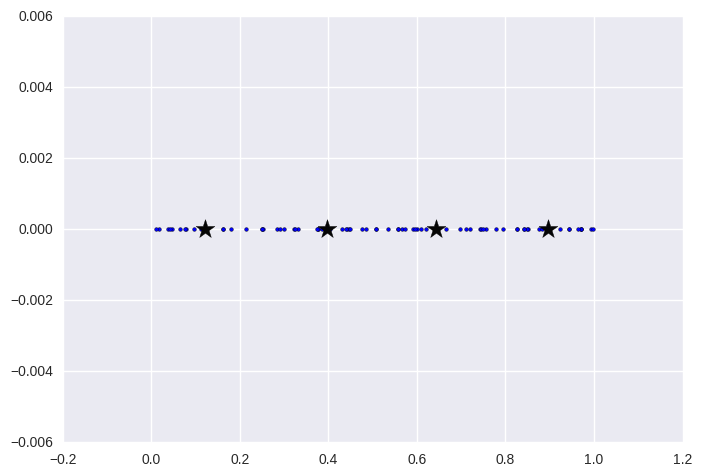

In [13]:
fig

In [14]:
X1 = X_clt.copy()

In [27]:
centroid = C[:,0]
centroid[0]

0.12097006

In [15]:
# Collect clusters of points in list
c_list = []
for i in range(k):
        points = np.array([X1[j] for j in range(len(X1)) if clusters[j] == i])
        c_list.append(points)

In [16]:
cp = c_list.copy()

In [32]:
# Extract variance for each cluster
v_list=[]
for i in range(k):
    d = (cp[i][:,0] - centroid[i])**2
    v = np.mean(d)
    v_list.append(v)
    

In [33]:
v_list

[0.0068026664452870847,
 0.0057598430203631527,
 0.0047101354380528915,
 0.004800915324416166]

In [36]:
vc = v_list.copy()

In [37]:
# Compute RBF for a single input
def rbf(var, centroid, x):
    t1 = 2 * var   # Break down the computation to avoid parsing problem
    t2 = (x-centroid)**2
    t3 = -t2/t1
    phi = np.exp(t3)
    return phi

In [40]:
rbf(vc[0], centroid[3], cp[3][0,0])

0.85799038931174909

In [44]:
test_data = pd.DataFrame({'x': x, 'h': h })

In [49]:
test_data.sample(1)['x']

70    0.373641
Name: x, dtype: float64

In [51]:
centroid[1]

0.64403272

In [53]:
w = np.zeros((5,1))
#w[1,:] = -0.3
#w[2,:] = -0.05
#w[3,:] = -0.8
phi_x = np.zeros((1,5))

for i in range(7500):
    
    # Take random samples
    sample = test_data.sample(1)
    x = np.array(sample['x'])
    h = np.array(sample['h'])
    # Compute RBFs
    
    for j in range(4):
        phi_x[:,j] = rbf(vc[j], centroid[j], x)
    # Compute sigma
    phi_x[:,4]=1
    sigma = phi_x@w
    
    # compute e
    e = h-sigma
    
    # update w
    if e > 0.05:
        w = w + 0.01*e*(phi_x.T)
    

In [54]:
w

array([[ 0.22042956],
       [ 0.01930237],
       [ 0.22116975],
       [ 0.03126549],
       [ 0.83333224]])

In [56]:
t = np.arange(0,1.0,0.00001)
tt = np.zeros((100000,5))
t.shape

(100000,)

In [57]:
phi_x = np.zeros((1,5))

for i in range(len(t)):
     # Compute RBFs
    for j in range(4):
         phi_x[:,j] = rbf(vc[j], C[j,0], t[i])
    phi_x[:,4]=1
    tt[i,:] = phi_x

In [58]:
ttt = tt@w